In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import csv
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_dir = r"C:\Users\rafci\Desktop\tensorflow-speech-recognition-challenge\train"

classes = os.listdir(os.path.join(train_dir,'audio'))
if "_background_noise_" in classes:
    classes.remove("_background_noise_")
classes

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero']

In [4]:
import shutil
import os
background_noise_dir = os.path.join(train_dir, "audio", "_background_noise_")

if os.path.exists(background_noise_dir):
    shutil.move(background_noise_dir, train_dir)

os.listdir(os.path.join(train_dir, "audio"))

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero']

In [5]:
def split_arr(arr):
    """
    split an array into chunks of length 16000
    Returns:
        list of arrays
    """
    return np.split(arr, np.arange(16000, len(arr), 16000))
    
    

In [42]:
import soundfile as sf

def create_silence():
    """
    reads wav files in background noises folder, 
    splits them and saves to silence folder in train_dir
    """
    for file in os.listdir(os.path.join(train_dir,"_background_noise_/")):
        if ".wav" in file:
            sig, sr = librosa.load(os.path.join(train_dir,"_background_noise_/")+file, sr = 16000) 
            sig_arr = split_arr(sig)
            if not os.path.exists(train_dir+"/audio/silence/"):
                os.makedirs(train_dir+"/audio/silence/")
            for ind, arr in enumerate(sig_arr):
                file_name = "frag%d" %ind + "_%s" %file # example: frag0_running_tap.wav
                sf.write(train_dir+"/audio/silence/"+file_name, arr, 16000)
  

In [43]:
create_silence()

In [44]:
folders = os.listdir(train_dir+"/audio")
# put folders in same order as in the classes list, used when making sets
all_classes = [x for x in classes]
for ind, cl in enumerate(folders):
    if cl not in classes:
        all_classes.append(cl)
print(all_classes)

['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero', 'silence']


In [45]:
with open(train_dir+"/validation_list.txt") as val_list:
    validation_list = [row[0] for row in csv.reader(val_list)]
assert len(validation_list) == 6798, "Validation files not loaded"
    

In [46]:
with open(train_dir+"/testing_list.txt") as val_list:
    validation_list = [row[0] for row in csv.reader(val_list)]
assert len(validation_list) == 6835, "testing files not loaded"
    

In [47]:
#validation_list.extend(testing_list)

In [48]:
# add silence files to validation_list
for i, file in enumerate(os.listdir(train_dir+"audio/silence/")):
    if i%10 == 0:
        validation_list.append("audio/silence/"+file)

In [49]:
training_list  = []
all_files_list = []
class_counts = {}

for folder in folders:
    files = os.listdir(os.path.join(train_dir,'audio',folder))
    for i, f in enumerate(files):
        all_files_list.append(folder+"/"+f)
        path = folder+'/'+f
        if path not in validation_list:
            training_list.append(folder+'/'+f)
        class_counts[folder] = i

#remove filenames from validation_list that don't exist anymore (due to eda)
validation_list = list(set(validation_list).intersection(all_files_list))

In [50]:
assert len(validation_list) + len(training_list) == len(all_files_list), "Not All files splitted"

In [51]:
# check random file name
print(training_list[345], "Size training set: ", len(training_list), 'size validation set: ', len(validation_list))

bed/3e3fa7fd_nohash_0.wav Size training set:  58288 size validation set:  6835


In [52]:
print(class_counts)

{'bed': 1712, 'bird': 1730, 'cat': 1732, 'dog': 1745, 'down': 2358, 'eight': 2351, 'five': 2356, 'four': 2371, 'go': 2371, 'happy': 1741, 'house': 1749, 'left': 2352, 'marvin': 1745, 'nine': 2363, 'no': 2374, 'off': 2356, 'on': 2366, 'one': 2369, 'right': 2366, 'seven': 2376, 'sheila': 1733, 'silence': 401, 'six': 2368, 'stop': 2379, 'three': 2355, 'tree': 1732, 'two': 2372, 'up': 2374, 'wow': 1744, 'yes': 2376, 'zero': 2375}


Min:  -0.1182251 
Max:  0.10827637 
Mean:  7.842428e-06 
Median:  0.0 
Variance:  0.0003236237 
Length:  10923


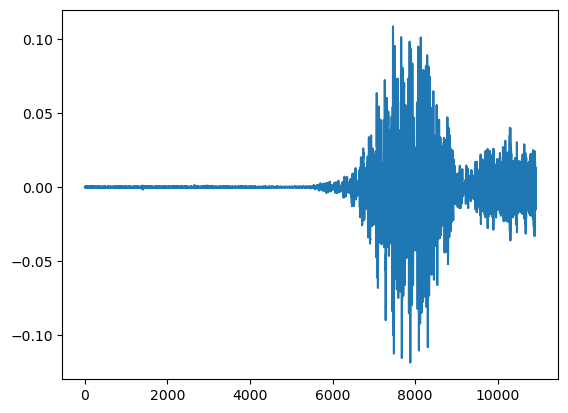

In [53]:
x, r = librosa.load(train_dir+"/audio/yes/bfdb9801_nohash_0.wav", sr=16000)

print("Min: ", np.min(x), 
      "\nMax: ", np.max(x),
      "\nMean: ", np.mean(x),
      "\nMedian: ", np.median(x),
      "\nVariance: ", np.var(x),
      "\nLength: ", len(x),)
plt.plot(x)

### Turn all wav files into spectrograms


In [54]:
def make_spec(file, file_dir=train_dir, flip=False, ps=False, st = 4):
    """
    create a melspectrogram from the amplitude of the sound
    
    Args:
        file (str): filename
        file_dir (str): directory path
        flip (bool): reverse time axis
        ps (bool): pitch shift
        st (int): half-note steps for pitch shift
    Returns:
        np.array with shape (122,85) (time, freq)
    """
    
    sig, sr = librosa.load(file_dir+'/audio/'+file, sr=16000)
    
    if len(sig) < 16000: #pad shorter than 1 sec audio with ramp to zero
        sig = np.pad(sig, (0,16000-len(sig)), "linear_ramp")
        
    if ps:
        sig = librosa.effects.pitch_shift(sig, rate, st)
        
    D = librosa.amplitude_to_db(librosa.stft(sig[:16000], 
                                             n_fft=512, 
                                             hop_length=128,
                                             center=False),
                               ref=np.max)
    S = librosa.feature.melspectrogram(S=D, n_mels=85).T
    
    if flip:
        S = np.flipud(S)
    
    return S.astype(np.float32)

C:\Users\rafci\AppData\Local\Temp\ipykernel_8972\3639304315.py:23: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sig[:16000],


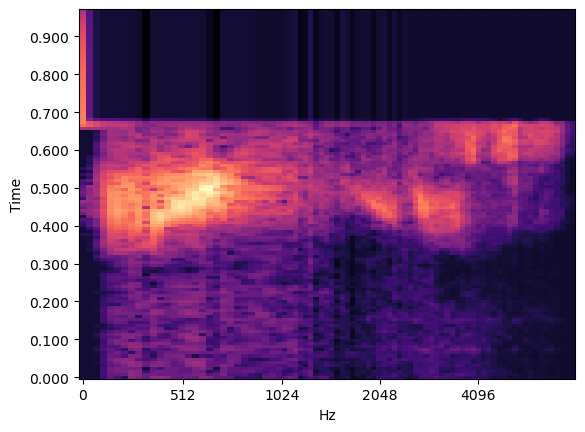

In [55]:
librosa.display.specshow(make_spec("yes/bfdb9801_nohash_0.wav"),
                         x_axis="mel",
                         fmax=8000,
                         y_axis="time",
                         sr=16000,
                         hop_length=128)

In [56]:
make_spec('yes/bfdb9801_nohash_0.wav').shape

C:\Users\rafci\AppData\Local\Temp\ipykernel_8972\3639304315.py:23: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sig[:16000],


(122, 85)

In [57]:
def create_sets(file_list=training_list):
    X_array = np.zeros([len(file_list), 122, 85])
    y_array = np.zeros([len(file_list)])
    for ind, file in enumerate(file_list):
        if ind%2000 == 0:
            print(ind, file)
        try:
            X_array[ind] = make_spec(file)
        except ValueError:
            print(ind, file, ValueError)
        y_array[ind] = all_classes.index(file.rsplit('/')[0])
        
    return X_array, y_array

In [58]:
X_train, y_train = create_sets() # takes a while

C:\Users\rafci\AppData\Local\Temp\ipykernel_8972\3639304315.py:23: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sig[:16000],


0 bed/00176480_nohash_0.wav
2000 bird/50d1c8e3_nohash_2.wav
4000 cat/98582fee_nohash_0.wav
6000 dog/da76aa58_nohash_0.wav
8000 down/d90b4138_nohash_2.wav
10000 eight/c7aaad67_nohash_2.wav
12000 five/c1b7c224_nohash_0.wav
14000 four/b5aacf2c_nohash_1.wav
16000 go/acde7e73_nohash_0.wav
18000 happy/ccea893d_nohash_0.wav
20000 left/0a7c2a8d_nohash_1.wav
22000 left/fd395b74_nohash_0.wav
24000 nine/2df590cd_nohash_0.wav
26000 no/25132942_nohash_2.wav
28000 off/1a4259c3_nohash_0.wav
30000 on/0ac15fe9_nohash_1.wav
32000 on/f97e1fcd_nohash_0.wav
34000 one/eb6dab4a_nohash_0.wav
36000 right/df1d5024_nohash_3.wav
38000 seven/cd3331a6_nohash_1.wav
40000 silence/frag15_exercise_bike.wav
42000 six/c7aa72e6_nohash_0.wav
44000 stop/bab36420_nohash_1.wav
46000 three/b0c0197e_nohash_0.wav
48000 tree/db9d52d2_nohash_1.wav
50000 two/d750966e_nohash_0.wav
52000 up/c948d727_nohash_1.wav
54000 wow/f9ebdba0_nohash_0.wav
56000 yes/ec21c46b_nohash_0.wav
58000 zero/dbb40d24_nohash_3.wav


In [59]:
X_train.shape

(58288, 122, 85)

In [60]:
x

(58288,)

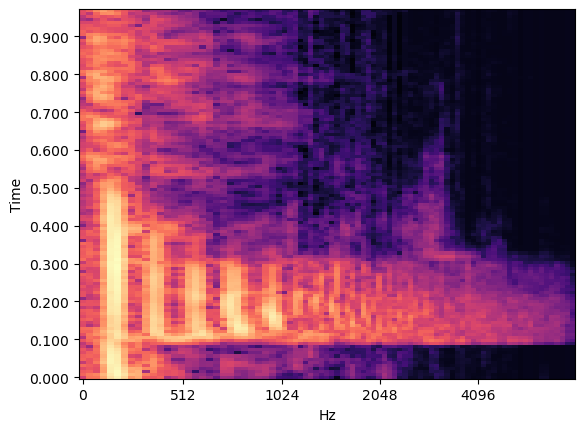

In [61]:
librosa.display.specshow(X_train[6500],
                         x_axis="mel",
                         fmax=8000,
                         y_axis="time",
                         sr=16000,
                         hop_length=128)

In [62]:
print('min: ',np.min(X_train), 
      '\nmax: ', np.max(X_train), 
      '\nmean: ', np.mean(X_train),
      '\nmedian: ', np.median(X_train),
      '\nvariance: ', np.var(X_train))

min:  -2.0306179523468018 
max:  9.682740653715882e-08 
mean:  -1.3096784018893604 
median:  -1.3609199523925781 
variance:  0.19717823208844


(array([ 1251384.,   144083.,  3306608.,  7618102., 83285749., 22882831.,
        16927104., 16956370., 16192552., 16469305., 16947610., 17438987.,
        17922973., 18298708., 18586361., 18765259., 18836626., 18791054.,
        18603638., 18278402., 17796311., 17182504., 16462651., 15679885.,
        14858559., 14014267., 13165077., 12311353., 11492127., 10696878.,
         9937240.,  9212140.,  8527509.,  7894114.,  7299857.,  6757882.,
         6259775.,  5788077.,  5321473.,  4854653.,  4376137.,  3895954.,
         3384734.,  2834968.,  2270353.,  1741545.,  1297835.,   861708.,
          525120.,   242168.]),
 array([-2.03061795e+00, -1.99000559e+00, -1.94939323e+00, -1.90878087e+00,
        -1.86816851e+00, -1.82755615e+00, -1.78694379e+00, -1.74633143e+00,
        -1.70571906e+00, -1.66510670e+00, -1.62449434e+00, -1.58388198e+00,
        -1.54326962e+00, -1.50265726e+00, -1.46204490e+00, -1.42143254e+00,
        -1.38082018e+00, -1.34020782e+00, -1.29959545e+00, -1.25898309e+

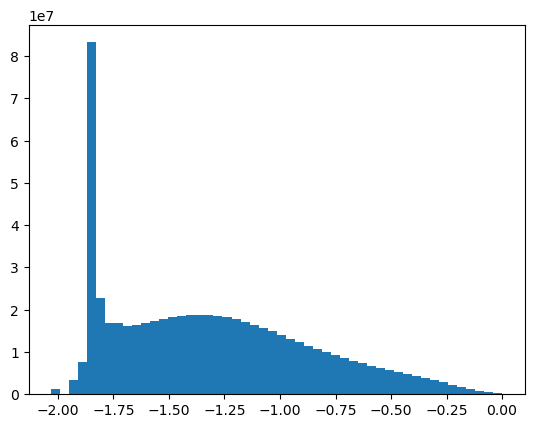

In [63]:
plt.hist(X_train.flatten(), bins=50)

In [64]:
# np.save("./data/X_train.npy", np.expand_dims(X_train, -1)+1.3)
# np.save("./data/y_train.npy", y_train.astype(np.int))

In [65]:
X_val, y_val = create_sets(file_list=validation_list)

0 bird/b49caed3_nohash_0.wav


C:\Users\rafci\AppData\Local\Temp\ipykernel_8972\3639304315.py:23: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sig[:16000],


2000 zero/022cd682_nohash_0.wav
4000 down/5e3dde6b_nohash_4.wav
6000 six/9a69672b_nohash_3.wav


(array([ 132252.,   19144.,  380062.,  872352., 9725958., 2832750.,
        2136185., 2134145., 2062182., 2103119., 2149606., 2189429.,
        2215754., 2230694., 2232124., 2220295., 2204843., 2175634.,
        2142395., 2091822., 2029331., 1954946., 1868699., 1774149.,
        1680714., 1585515., 1491062., 1394453., 1299529., 1205920.,
        1114544., 1027738.,  946453.,  872251.,  805734.,  744133.,
         687479.,  636621.,  583183.,  530316.,  479420.,  426755.,
         372838.,  315420.,  255956.,  200623.,  153142.,  102180.,
          63089.,   26012.]),
 array([-2.03061795e+00, -1.99000559e+00, -1.94939323e+00, -1.90878087e+00,
        -1.86816851e+00, -1.82755615e+00, -1.78694379e+00, -1.74633143e+00,
        -1.70571906e+00, -1.66510670e+00, -1.62449434e+00, -1.58388198e+00,
        -1.54326962e+00, -1.50265726e+00, -1.46204490e+00, -1.42143254e+00,
        -1.38082018e+00, -1.34020782e+00, -1.29959545e+00, -1.25898309e+00,
        -1.21837073e+00, -1.17775837e+00, -1.1

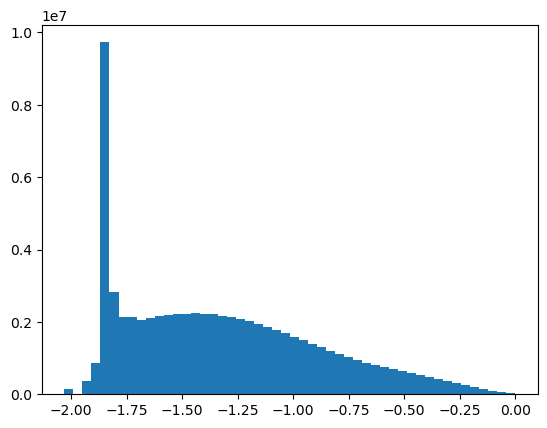

In [66]:
plt.hist(X_val.flatten(), bins=50)

In [67]:
# np.save('data/X_val.npy', np.expand_dims(X_val, -1)+1.3)
# np.save('data/y_val.npy', y_val.astype(np.int))

In [68]:
import numpy as np
import os

In [69]:
# train_dir = "./data/train/audio/"

# X_train = np.load("./data/X_train.npy")
# y_train = np.load("./data/y_train.npy")

# X_val = np.load("./data/X_val.npy")
# y_val = np.load("./data/y_val.npy")

In [70]:
X_train.shape

(58288, 122, 85)

In [71]:
X_train = X_train.reshape((-1, X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((-1, X_val.shape[1], X_val.shape[2]))

In [72]:
classes = os.listdir(train_dir+'/audio/')
classes

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'silence',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero']

In [73]:
from collections import Counter

def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return {cls: float(majority/count) for cls, count in counter.items()}

class_weights = get_class_weights(y_train)
class_weights

{0.0: 1.391021470396877,
 1.0: 1.3591862682771774,
 2.0: 1.3643905552010211,
 3.0: 1.3652618135376755,
 4.0: 1.0151946818613484,
 5.0: 1.020525059665871,
 6.0: 1.024928092042186,
 7.0: 1.0089664936290703,
 8.0: 1.008015087223008,
 9.0: 1.3687580025608195,
 10.0: 1.33625,
 11.0: 1.024928092042186,
 12.0: 1.3497474747474747,
 13.0: 1.0156769596199524,
 14.0: 1.0070654733867168,
 15.0: 1.020525059665871,
 16.0: 1.008015087223008,
 17.0: 1.0075400565504242,
 18.0: 1.0142314990512333,
 19.0: 1.0,
 20.0: 1.3811369509043927,
 30.0: 5.318407960199005,
 21.0: 1.0061176470588236,
 22.0: 1.003284842796809,
 23.0: 1.0234561991383437,
 24.0: 1.3883116883116884,
 25.0: 1.013750592697961,
 26.0: 1.016642891107941,
 27.0: 1.3531645569620254,
 28.0: 1.008015087223008,
 29.0: 1.0056444026340545}

In [74]:
NB_CLASSES = len(classes)

In [75]:
def convert_list_dict(lst):
    res_dct = {i: val for i, val in enumerate(lst)}
    return res_dct
         
classes_index = convert_list_dict(classes)
classes_index

{0: 'bed',
 1: 'bird',
 2: 'cat',
 3: 'dog',
 4: 'down',
 5: 'eight',
 6: 'five',
 7: 'four',
 8: 'go',
 9: 'happy',
 10: 'house',
 11: 'left',
 12: 'marvin',
 13: 'nine',
 14: 'no',
 15: 'off',
 16: 'on',
 17: 'one',
 18: 'right',
 19: 'seven',
 20: 'sheila',
 21: 'silence',
 22: 'six',
 23: 'stop',
 24: 'three',
 25: 'tree',
 26: 'two',
 27: 'up',
 28: 'wow',
 29: 'yes',
 30: 'zero'}

In [76]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=NB_CLASSES)
y_val = to_categorical(y_val, num_classes=NB_CLASSES)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
!pip install livelossplot


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from keras.layers import Conv1D, MaxPool1D, Concatenate, BatchNormalization, Activation, Input, Add, \
                         GlobalAveragePooling1D, Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from livelossplot import PlotLossesKeras
from tensorflow.keras.metrics import Recall, Precision
import keras
import time

In [ ]:
import keras.backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
class Classifier_INCEPTION:
    def __init__(self, weights_directory, input_shape, nb_classes, verbose=False, build=True, batch_size=64,
                 nb_filters=32, use_residual=True, use_bottleneck=True, depth=10, kernel_size=41, nb_epochs=1):
        self.weights_directory = weights_directory
        self.nb_filters = nb_filters
        self.use_residual = use_residual
        self.use_bottleneck = use_bottleneck
        self.depth = depth
        self.kernel_size = kernel_size - 1
        self.callbacks = None
        self.batch_size = batch_size
        self.bottleneck_size = 32
        self.nb_epochs = nb_epochs

        if build == True:
            self.model = self.build_model(input_shape, nb_classes)
            if (verbose == True):
                self.model.summary()
            self.verbose = verbose

    def _inception_module(self, input_tensor, stride=1, activation='linear'):

        if self.use_bottleneck and int(input_tensor.shape[-1]) > 1:
            input_inception = Conv1D(filters=self.bottleneck_size, kernel_size=1,
                                     padding='same', activation=activation, use_bias=False)(input_tensor)
        else:
            input_inception = input_tensor

        kernel_size_s = [self.kernel_size // (2 ** i) for i in range(3)]

        conv_list = []

        for i in range(len(kernel_size_s)):
            conv_list.append(Conv1D(filters=self.nb_filters, kernel_size=kernel_size_s[i],
                                    strides=stride, padding='same', activation=activation, use_bias=False)(
                input_inception))

        max_pool_1 = MaxPool1D(pool_size=3, strides=stride, padding='same')(input_tensor)

        conv_6 = Conv1D(filters=self.nb_filters, kernel_size=1,
                        padding='same', activation=activation, use_bias=False)(max_pool_1)

        conv_list.append(conv_6)

        x = Concatenate(axis=2)(conv_list)
        x = BatchNormalization()(x)
        x = Activation(activation='relu')(x)
        return x

    def _shortcut_layer(self, input_tensor, out_tensor):
        shortcut_y = Conv1D(filters=int(out_tensor.shape[-1]), kernel_size=1,
                            padding='same', use_bias=False)(input_tensor)
        shortcut_y = BatchNormalization()(shortcut_y)

        x = Add()([shortcut_y, out_tensor])
        x = Activation('relu')(x)
        return x

    def build_model(self, input_shape, nb_classes):
        input_layer = Input(input_shape)

        x = input_layer
        input_res = input_layer

        for d in range(self.depth):

            x = self._inception_module(x)

            if self.use_residual and d % 3 == 2:
                x = self._shortcut_layer(input_res, x)
                input_res = x

        gap_layer = GlobalAveragePooling1D()(x)

        output_layer = Dense(nb_classes, activation='softmax')(gap_layer)

        model = Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(),
                      metrics=['accuracy', Precision(), Recall(), f1_score])

        reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                      factor=0.5, 
                                      patience=int(self.nb_epochs/20),
                                      min_lr=0.0001)
        
        file_path = os.path.join(self.weights_directory,"best_weights.h5")
        model_checkpoint = ModelCheckpoint(filepath=file_path, 
                                           monitor='val_accuracy',
                                           mode="max",
                                           save_best_only=True)
        
        early_stopping = EarlyStopping(monitor="val_accuracy", 
                                       mode="max", 
                                       verbose=1, 
                                       patience=int(self.nb_epochs/10))
        plotlosses = PlotLossesKeras()
        self.callbacks = [reduce_lr, model_checkpoint, early_stopping, plotlosses]
        return model

    def fit(self, x_train, y_train, x_val, y_val, class_weights=None):       
        if self.batch_size is None:
            mini_batch_size = int(min(x_train.shape[0] / 10, 16))
        else:
            mini_batch_size = self.batch_size

        start_time = time.time()
        hist = self.model.fit(x_train, y_train, 
                              batch_size=mini_batch_size, 
                              epochs=self.nb_epochs,
                              verbose=self.verbose, 
                              validation_data=(x_val, y_val), 
                              callbacks=self.callbacks)
        
        duration = time.time() - start_time
        keras.backend.clear_session()
        print("Model take {} S to train ".format(duration))
        return hist

In [ ]:
INPUT_SHAPE = X_train.shape[1:]
BATCH_SIZE = 64

In [ ]:
WEIGHTS_DIR = "./"
inception = Classifier_INCEPTION(WEIGHTS_DIR, INPUT_SHAPE, NB_CLASSES, 1, batch_size=BATCH_SIZE, build=True)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 122, 85)]    0           []                               
                                                                                                  
 conv1d_53 (Conv1D)             (None, 122, 32)      2720        ['input_2[0][0]']                
                                                                                                  
 max_pooling1d_10 (MaxPooling1D  (None, 122, 85)     0           ['input_2[0][0]']                
 )                                                                                                
                                                                                                  
 conv1d_54 (Conv1D)             (None, 122, 32)      40960       ['conv1d_53[0][0]']        

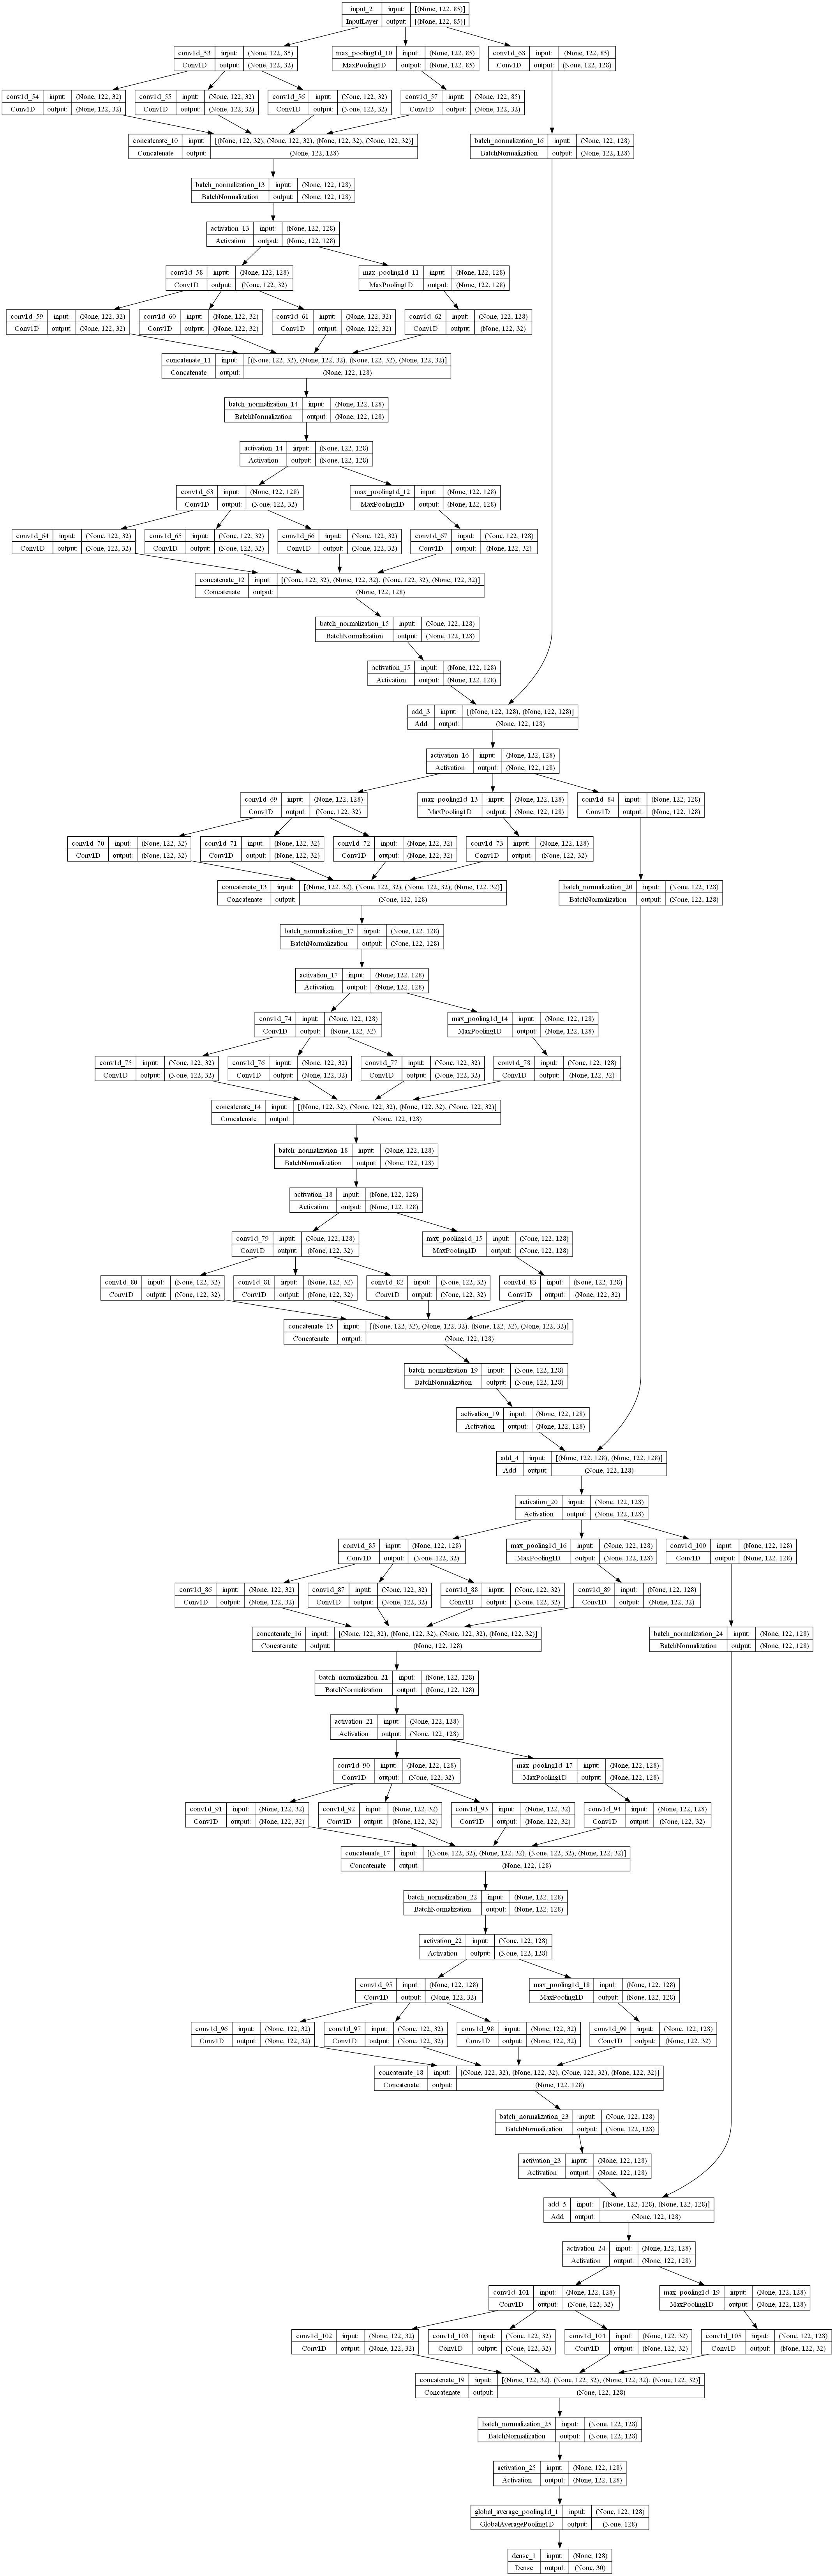

In [ ]:
from tensorflow.keras.utils import plot_model

#adjust these strings for organizeing the saved files
date = '4-10-2022'
model_name = 'InceptionTime'

# to save a png of the model you need pydot and graphviz installed
plot_model(inception.model, 
           to_file = './{}_{}.png'.format(model_name,date), 
           show_shapes = True)

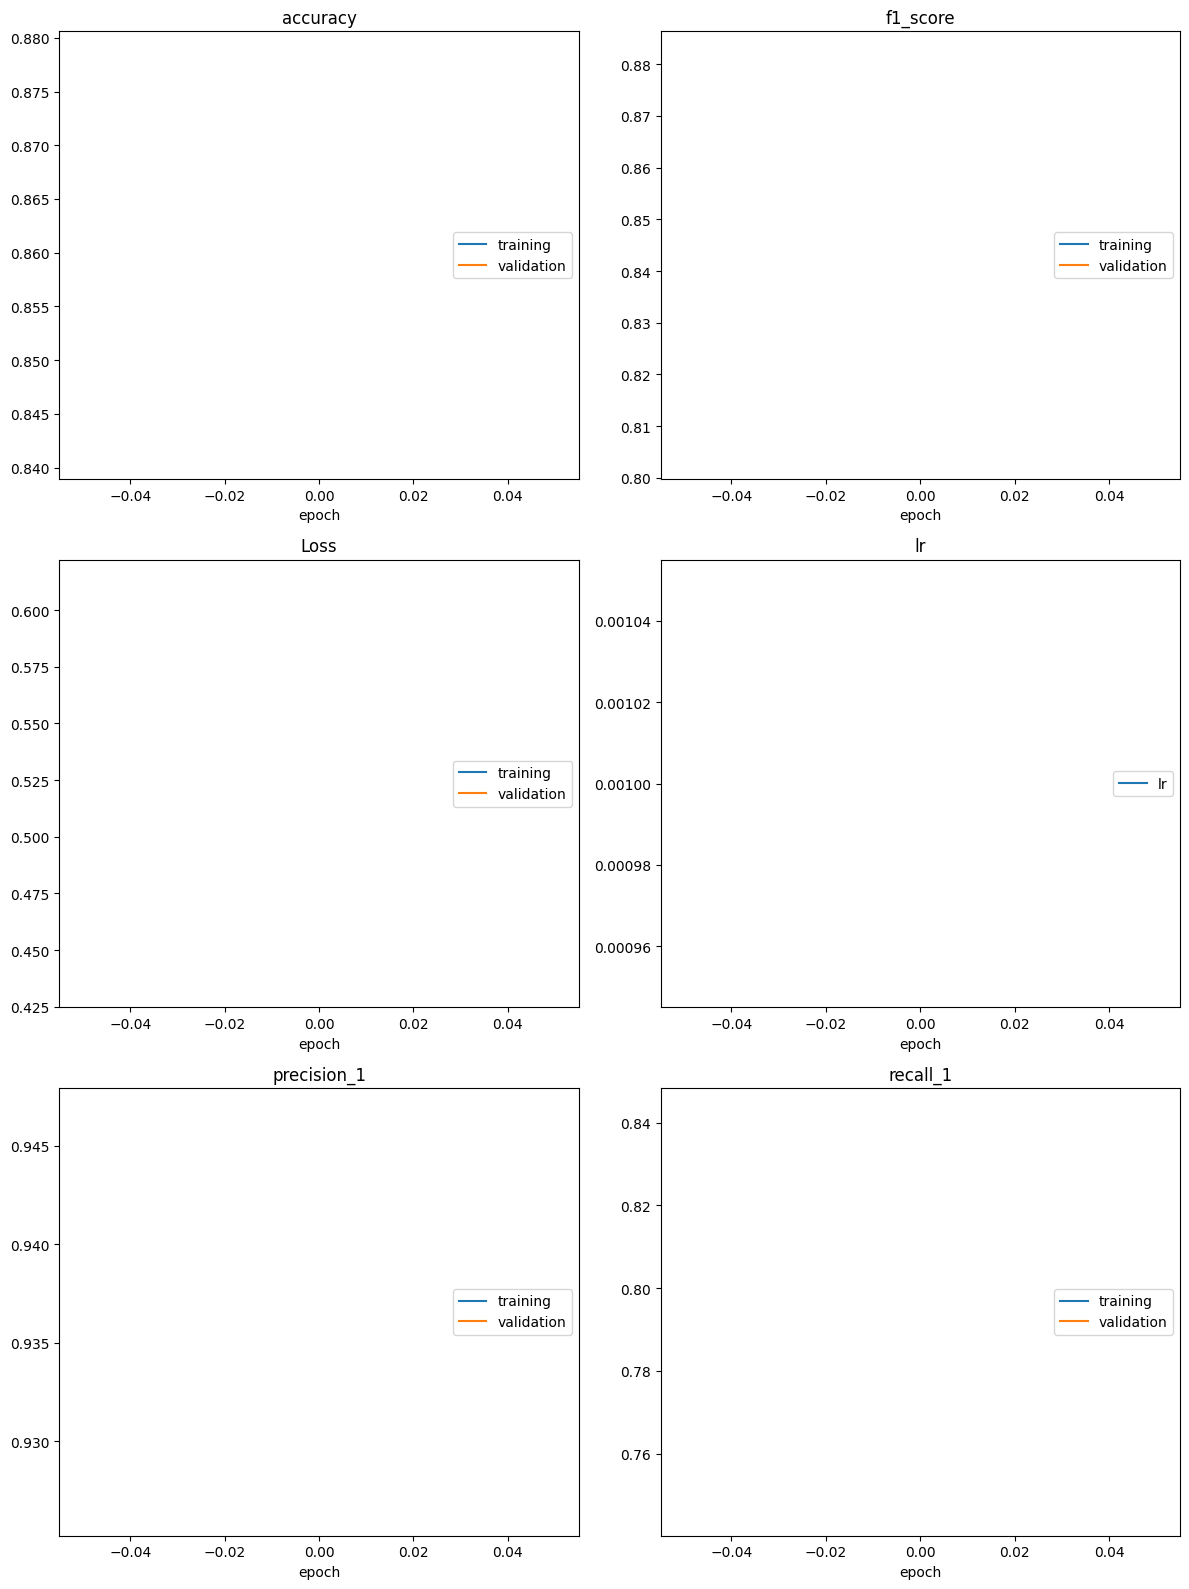

accuracy
	training         	 (min:    0.841, max:    0.841, cur:    0.841)
	validation       	 (min:    0.879, max:    0.879, cur:    0.879)
f1_score
	training         	 (min:    0.804, max:    0.804, cur:    0.804)
	validation       	 (min:    0.882, max:    0.882, cur:    0.882)
Loss
	training         	 (min:    0.613, max:    0.613, cur:    0.613)
	validation       	 (min:    0.434, max:    0.434, cur:    0.434)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
precision_1
	training         	 (min:    0.947, max:    0.947, cur:    0.947)
	validation       	 (min:    0.926, max:    0.926, cur:    0.926)
recall_1
	training         	 (min:    0.745, max:    0.745, cur:    0.745)
	validation       	 (min:    0.843, max:    0.843, cur:    0.843)
905/905 [==============================] - 33s 33ms/step - loss: 0.6133 - accuracy: 0.8408 - precision_1: 0.9469 - recall_1: 0.7451 - f1_score: 0.8037 - val_loss: 0.4337 - val_accuracy: 0.8787 - val_precision_1: 0.9263 - val_re

In [ ]:
history = inception.fit(X_train, y_train, X_val, y_val)

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'f1_score', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1', 'val_f1_score', 'lr'])


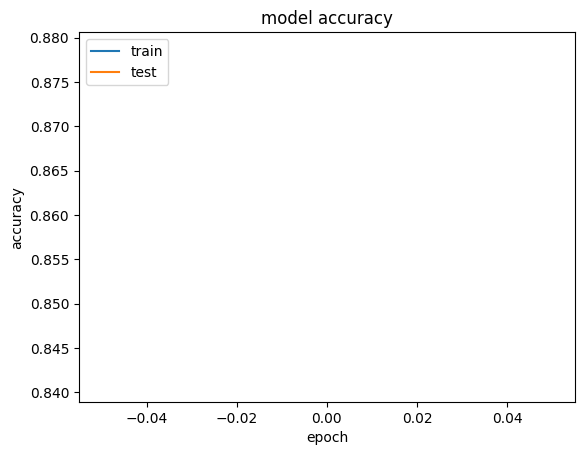

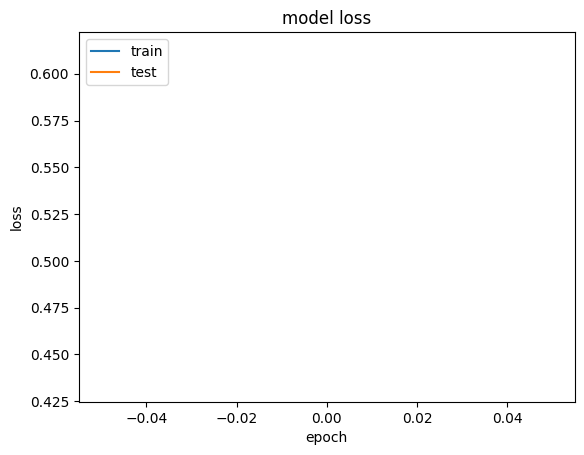

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#%% visualize training
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('{}_{}_accuracy.png'.format(model_name, date),bbox_inches='tight')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('{}_{}_loss.png'.format(model_name, date), bbox_inches='tight')
plt.show()

In [ ]:
inception.model.load_weights("./best_weights.h5")

In [ ]:
inception.model.evaluate(X_val, y_val)

214/214 [==============================] - 2s 10ms/step - loss: 0.4337 - accuracy: 0.8787 - precision_1: 0.9263 - recall_1: 0.8435 - f1_score: 0.8820


[0.43367674946784973,
 0.87871253490448,
 0.9262531995773315,
 0.8434528112411499,
 0.8820035457611084]

In [ ]:
y_hat = inception.model.predict(X_val, batch_size = BATCH_SIZE, verbose = 1)

107/107 [==============================] - 2s 13ms/step


In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):    
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
                                  
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(list(label_encoder.keys())[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

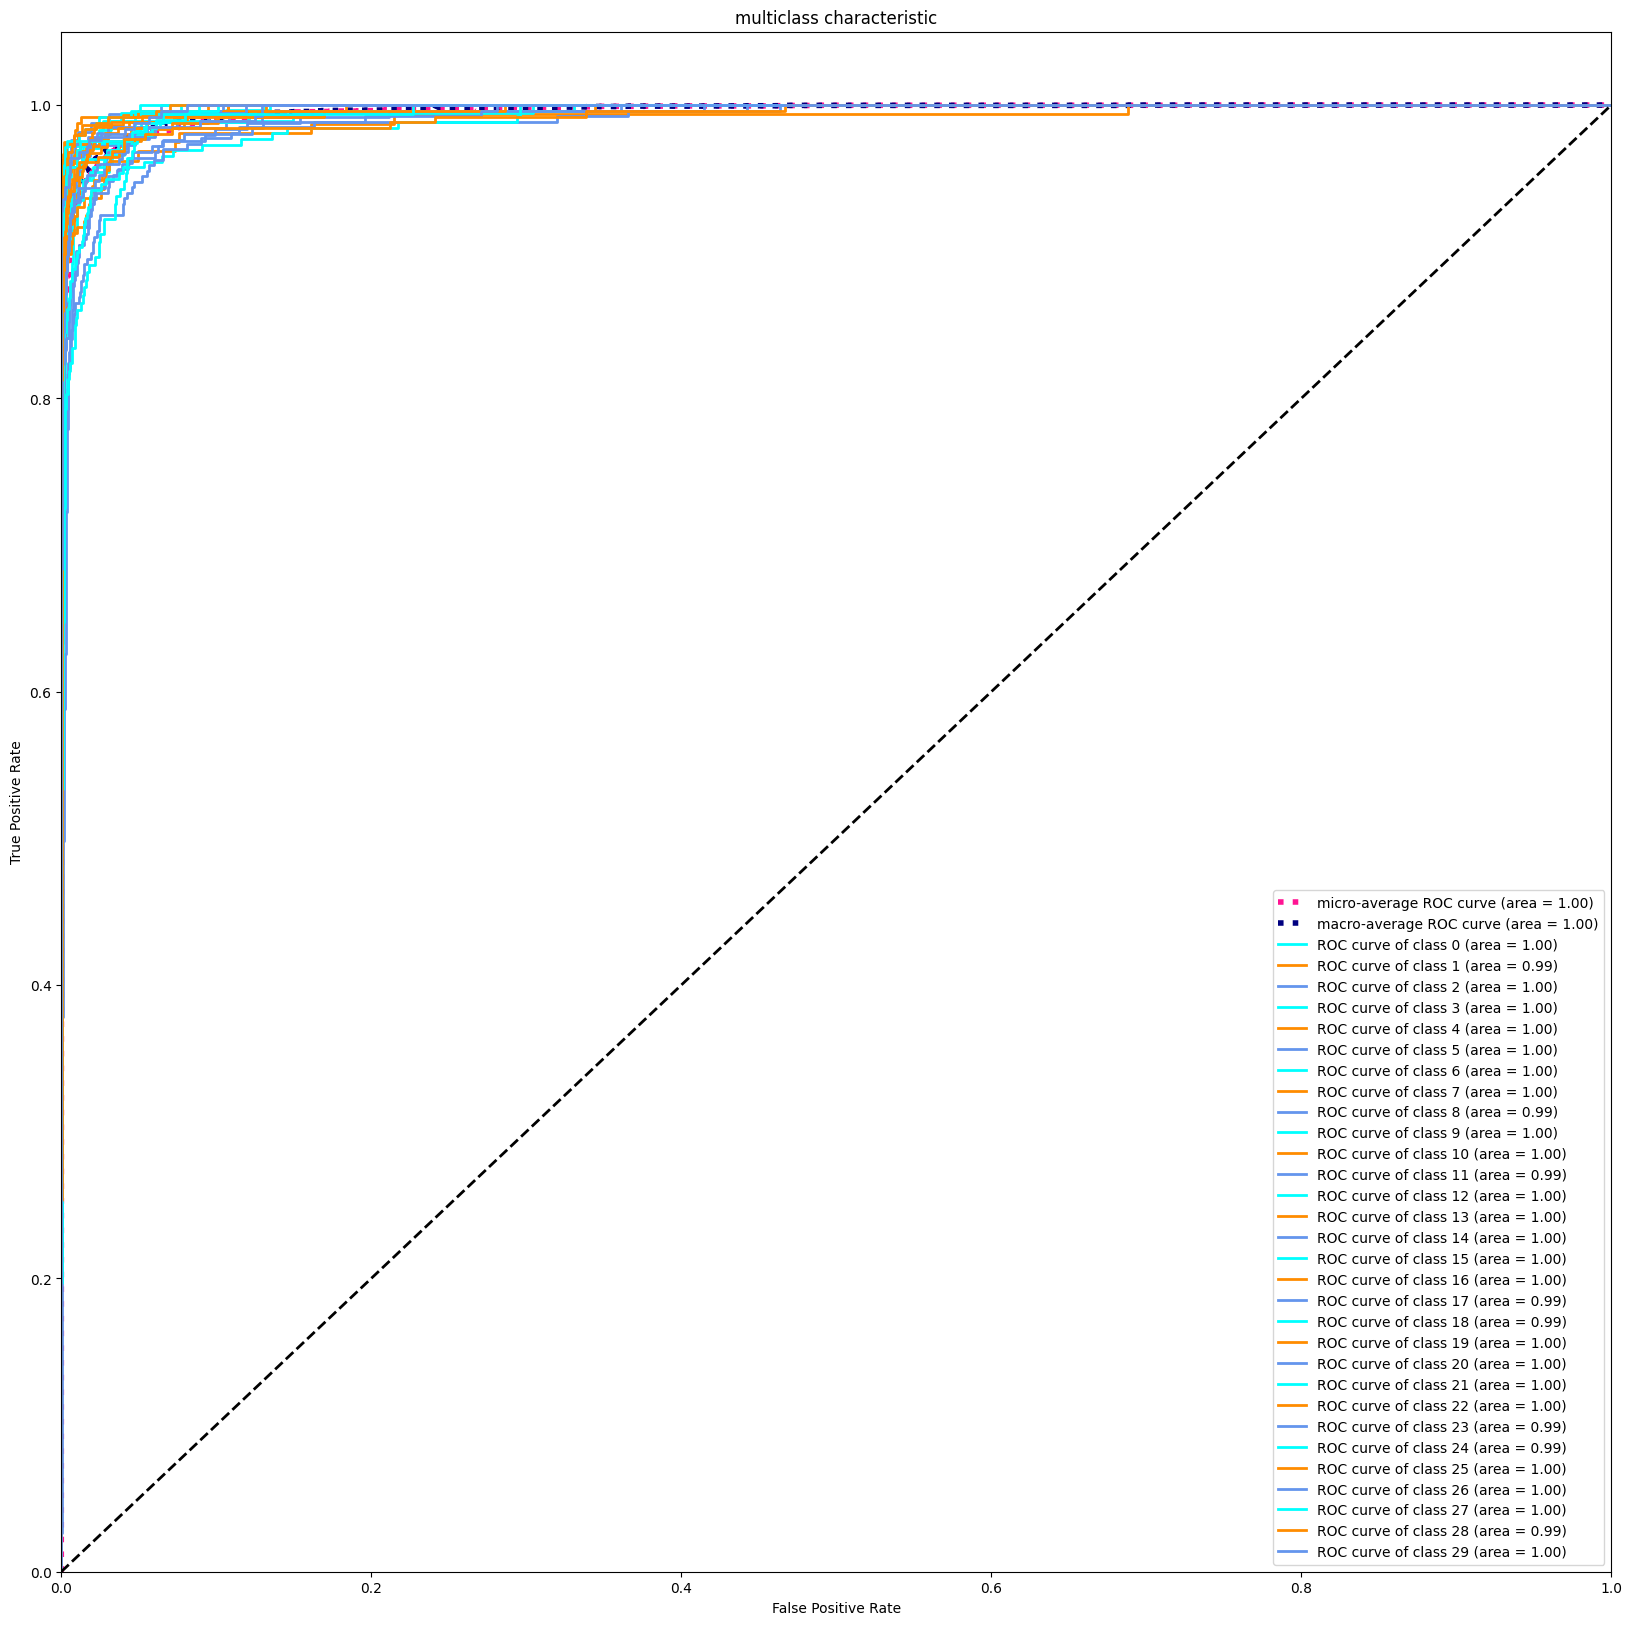

In [ ]:
ROC_plot(y_val, y_hat, classes_index, NB_CLASSES)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
import pandas as pd


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder],
                  columns = [i for i in label_encoder])
    plt.figure(figsize = (20,20))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder))

Accuracy:  0.8787125091441111
Precision::  0.8787125091441111
Recall::  0.8787125091441111
F1_Score::  0.8787125091441111

Macro precision_recall_fscore_support (macro) average
(0.8972152893071178, 0.8824079901499623, 0.8828278151243225, None)

Macro precision_recall_fscore_support (micro) average
(0.8787125091441111, 0.8787125091441111, 0.8787125091441111, None)

Macro precision_recall_fscore_support (weighted) average
(0.8958902476141946, 0.8787125091441111, 0.8797845876359183, None)

Confusion Matrix

Classification Report
              precision    recall  f1-score   support

         bed       0.82      0.87      0.85       176
        bird       0.96      0.84      0.90       158
         cat       0.78      0.98      0.87       166
         dog       0.94      0.92      0.93       180
        down       0.96      0.82      0.89       253
       eight       0.91      0.88      0.89       257
        five       0.64      0.97      0.77       271
        four       0.92      0.96  

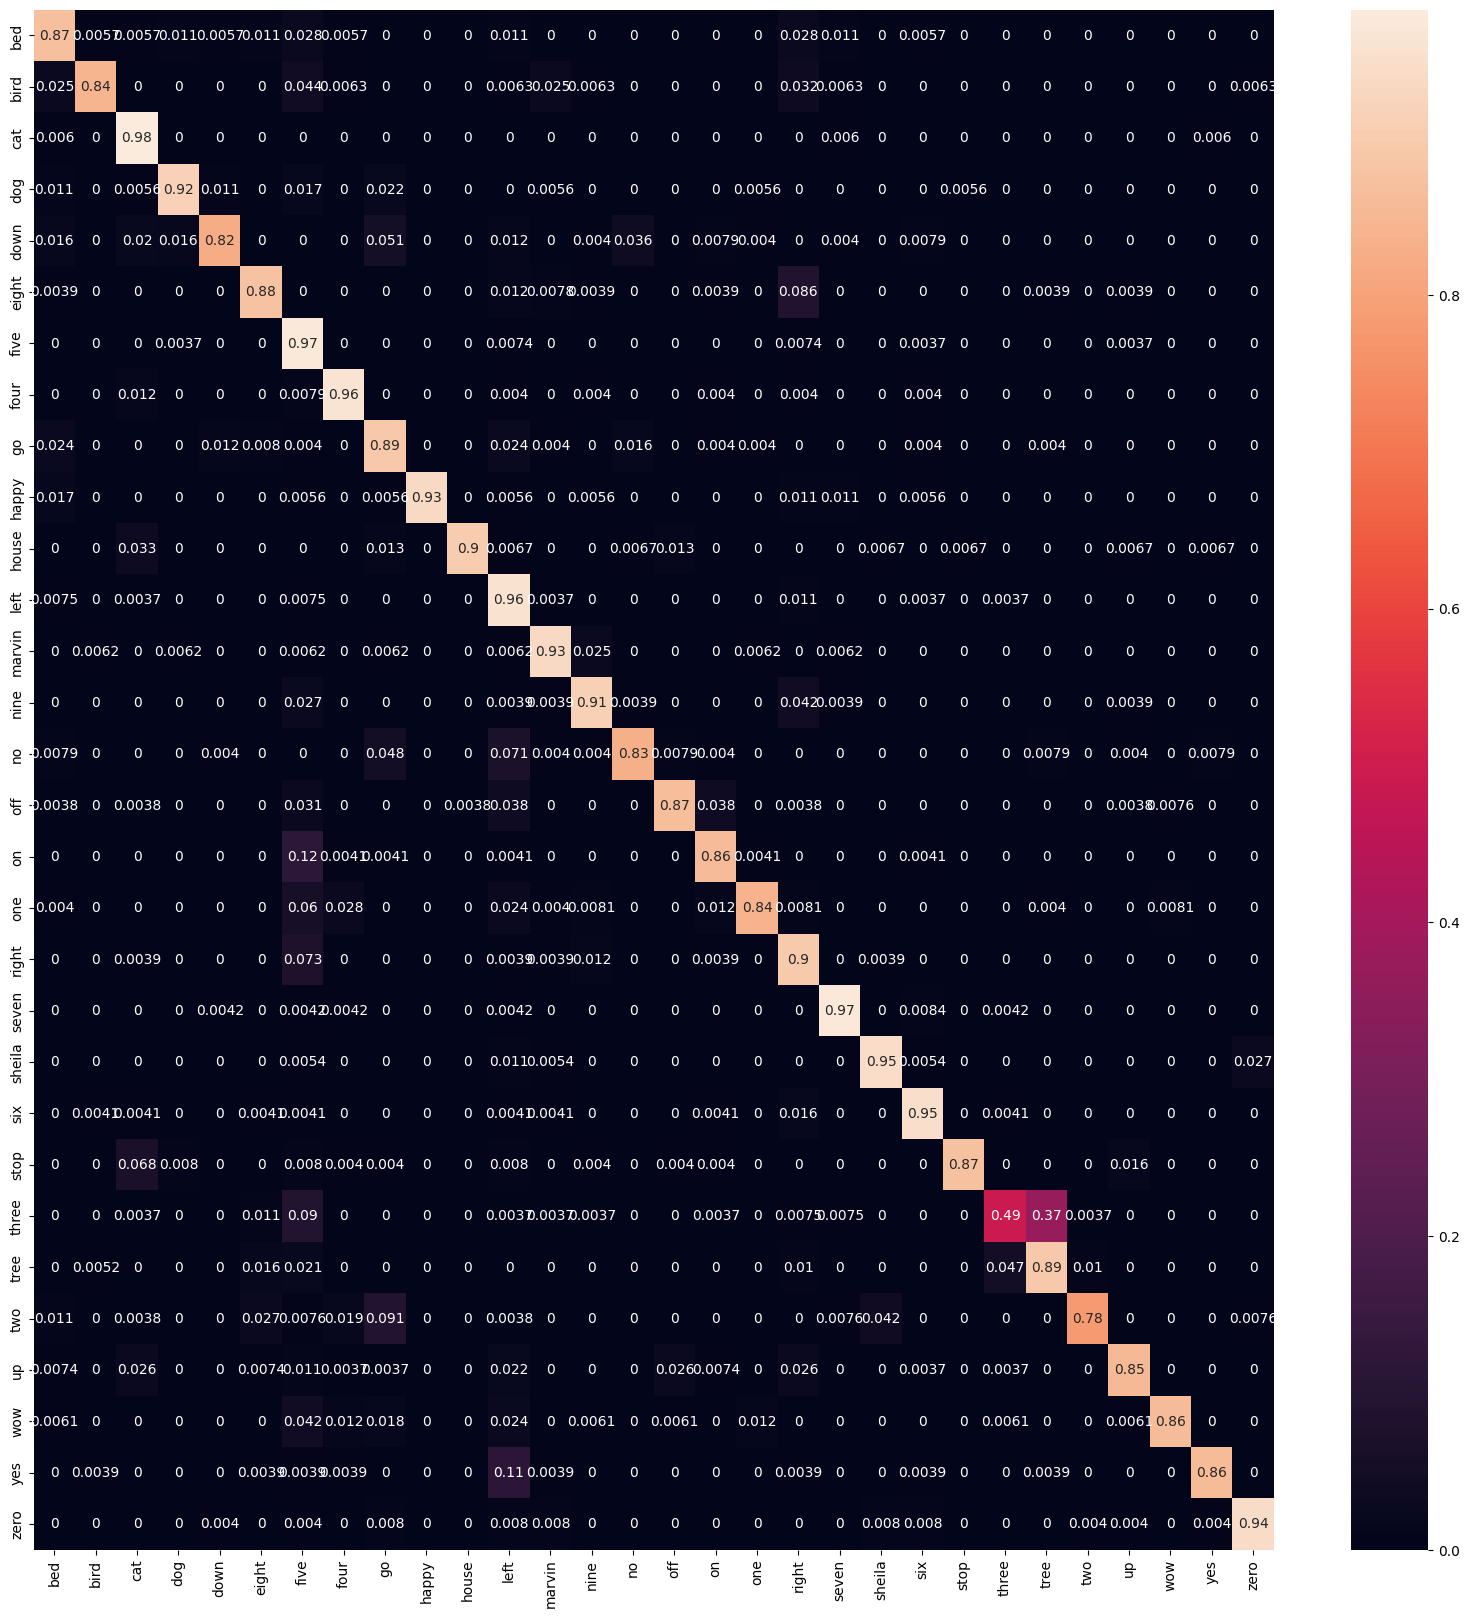

In [ ]:
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)

print_score(y_hat, y_true, classes)

In [ ]:
import numpy as np
import os

In [ ]:
# train_dir = "./data/train/audio/"

# X_train = np.load("./data/X_train.npy")
# y_train = np.load("./data/y_train.npy")

# X_val = np.load("./data/X_val.npy")
# y_val = np.load("./data/y_val.npy")

In [ ]:
X_train.shape

(57886, 122, 85)

In [ ]:
X_train = X_train.reshape((-1, X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((-1, X_val.shape[1], X_val.shape[2]))

In [ ]:
classes = os.listdir(train_dir+'/audio/')
classes

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero']

In [ ]:
NB_CLASSES = len(classes)

In [ ]:
def convert_list_dict(lst):
    res_dct = {i: val for i, val in enumerate(lst)}
    return res_dct
         
classes_index = convert_list_dict(classes)
classes_index

{0: 'bed',
 1: 'bird',
 2: 'cat',
 3: 'dog',
 4: 'down',
 5: 'eight',
 6: 'five',
 7: 'four',
 8: 'go',
 9: 'happy',
 10: 'house',
 11: 'left',
 12: 'marvin',
 13: 'nine',
 14: 'no',
 15: 'off',
 16: 'on',
 17: 'one',
 18: 'right',
 19: 'seven',
 20: 'sheila',
 21: 'six',
 22: 'stop',
 23: 'three',
 24: 'tree',
 25: 'two',
 26: 'up',
 27: 'wow',
 28: 'yes',
 29: 'zero'}

In [ ]:
!pip install livelossplot


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from keras.layers import Conv1D, BatchNormalization, Activation, Input, Dense, Bidirectional, LSTM, Dropout, TimeDistributed, Lambda
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from livelossplot import PlotLossesKeras
from tensorflow.keras.metrics import Recall, Precision
import keras
import keras.backend as K
import time

In [ ]:

char_map_str = """
<SPACE> 0
a 1
b 2
c 3
d 4
e 5
f 6
g 7
h 8
i 9
j 10
k 11
l 12
m 13
n 14
o 15
p 16
q 17
r 18
s 19
t 20
u 21
v 22
w 23
x 24
y 25
z 26
' 27
"""

char_map = {}
index_map = {}

for line in char_map_str.strip().split('\n'):
    ch, index = line.split()
    char_map[ch] = int(index)
    index_map[int(index)] = ch

index_map[0] = ' '

In [ ]:
def text_to_int(text):
    """
    takes the character map and returns a series of 
    integers for the inserted text
    the 'silence' class returns only 27's
    """
    int_seq = []
    if text == 'silence':
        for r in range(8):
            int_seq.append(27)
    else:
        for c in text:
            ch = char_map[c]
            int_seq.append(ch)
    return int_seq

In [ ]:
def get_intseq(trans, max_len = 8):
    """
    pads integer list with 27's up to max length
    """
    t = text_to_int(trans)
    while (len(t) < max_len):
        t.append(27)
    return t

In [ ]:
def get_ctc_params(y, classes_list, len_char_map = 28):
    """
    Usage:
        creates parameters required for K.ctc_batch_cost function 
    Args:
        Y (ndarray): target set with all classes
        classes_list (list): list with class names
        len_char_map (int): length of the character map
    Returns:
        3 ndarrays
    """
    labels = np.array([get_intseq(classes_list[y[l]]) for l, _ in enumerate(y)])
    input_length = np.array([len_char_map for _ in y])
    label_length = np.array([8 for _ in y])
    return labels, input_length, label_length

In [ ]:
class CTC():
    """
    Usage:
        sr_ctc = CTC(enter input_size and output_size)
        sr_ctc.build()
        sr_ctc.m.compile()
        sr_ctc.tm.compile()
    """ 
    def __init__(self, input_shape, nb_classes, weights_directory='./', nb_epochs=1, batch_size=64):
        self.input_shape = input_shape
        self.nb_classes = nb_classes
        self.weights_directory = weights_directory
        self.nb_epochs = nb_epochs
        self.batch_size = batch_size
        self.m = None
        self.tm = None    
        
        self.build()
        
    def ctc_layer_func(self, args):
        y_pred, labels, input_length, label_length = args
        return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
    
    # dummy loss
    def ctc_loss(self, y_true, y_pred):
        return y_pred
        
    def build(self, conv_filters=196, conv_size=13, conv_strides=4, activation="relu", rnn_layers=2, lstm_units=128, drop_out=0.8):
        """
        build CTC training model (self.m) and 
        prediction model without the ctc loss function (self.tm)
        
        Usage: 
            enter conv parameters for Cov1D layer
            specify number of rnn layers, LSTM units and dropout
        Args:
            
        Returns:
            self.m: keras.engine.training.Model
            self.tm: keras.engine.training.Model
        """        
        
        inputs = Input(shape=self.input_shape, name='input')
        x = Conv1D(conv_filters, 
                   conv_size, 
                   strides = conv_strides, 
                   name = 'conv1d')(inputs)
        x = BatchNormalization()(x)
        x = Activation(activation)(x)
        for _ in range(rnn_layers):          
            x = Bidirectional(LSTM(lstm_units, 
                                   return_sequences = True))(x)
            x = Dropout(drop_out)(x)
            x = BatchNormalization()(x)
        outputs = TimeDistributed(Dense(self.nb_classes, activation="softmax"))(x)
        
        # ctc inputs
        labels = Input(name="the_labels", shape=[None,], dtype="int32")
        input_length = Input(name="input_length", shape=[1], dtype="int32")
        label_length = Input(name="label_length", shape=[1], dtype="int32")
        
        ctc_layer = Lambda(self.ctc_layer_func, output_shape=(1,), name="ctc")([outputs, labels, input_length, label_length])
        self.tm = Model(inputs=inputs, outputs=outputs)
        self.m = Model(inputs=[inputs,labels,input_length,label_length],
                       outputs=ctc_layer)            
        
        self.m.compile(loss=self.ctc_loss, 
                       optimizer=Adam(),
                       metrics=['accuracy'])
        
        self.tm.compile(loss=self.ctc_loss, 
                        optimizer=Adam())
              
        reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                      factor=0.5, 
                                      patience=int(self.nb_epochs/20),
                                      min_lr=0.0001)
        
        file_path = os.path.join(self.weights_directory,"ctc_best_weights.h5")
        model_checkpoint = ModelCheckpoint(filepath=file_path, 
                                           monitor='val_accuracy',
                                           mode="max",
                                           save_best_only=True)
        
        early_stopping = EarlyStopping(monitor="val_accuracy", 
                                       mode="max", 
                                       verbose=1, 
                                       patience=int(self.nb_epochs/10))
        plotlosses = PlotLossesKeras()
        self.callbacks = [reduce_lr, model_checkpoint, early_stopping, plotlosses]
     
        print(self.m.summary())
        print(self.tm.summary())
        
        return self.m, self.tm
    
    
    def fit(self, X_train, train_labels, train_input_length, train_label_length, y_train,
                  X_val, val_labels, val_input_length, val_label_length, y_val):       
        if self.batch_size is None:
            mini_batch_size = int(min(x_train.shape[0] / 10, 16))
        else:
            mini_batch_size = self.batch_size

        start_time = time.time()
        hist = sr_ctc.m.fit([np.squeeze(X_train), 
                            train_labels, 
                            train_input_length, 
                            train_label_length], 
                       np.zeros([len(y_train)]), 
                       batch_size = self.batch_size, 
                       epochs = self.nb_epochs, 
                       validation_data = ([np.squeeze(X_val), 
                                           val_labels, 
                                           val_input_length, 
                                           val_label_length],
                                          np.zeros([len(y_val)])), 
                       callbacks = self.callbacks, 
                       verbose = 1, 
                       shuffle = True)
        
        duration = time.time() - start_time
        keras.backend.clear_session()
        print("Model take {} S to train ".format(duration))
        return hist
    
    def str_out(self, dataset):
        k_ctc_out = K.ctc_decode(self.tm.predict(np.squeeze(dataset), 
                                                verbose = 1), 
                             np.array([28 for _ in dataset]))
        decoded_out = K.eval(k_ctc_out[0][0])
        str_decoded_out = []
        for i, _ in enumerate(decoded_out):     
            str_decoded_out.append("".join([index_map[c] for c in decoded_out[i] if not c == -1]))

        return str_decoded_out

In [ ]:
train_labels, train_input_length, train_label_length = get_ctc_params(y=y_train, classes_list=classes)
val_labels, val_input_length, val_label_length = get_ctc_params(y=y_val, classes_list=classes)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
INPUT_SHAPE = X_train.shape[1:]
BATCH_SIZE = 64

In [ ]:
WEIGHTS_DIR = "./"
sr_ctc = CTC(INPUT_SHAPE, NB_CLASSES, WEIGHTS_DIR, nb_epochs=100, batch_size=BATCH_SIZE)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 122, 85)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 28, 196)      216776      ['input[0][0]']                  
                                                                                                  
 batch_normalization (BatchNorm  (None, 28, 196)     784         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 28, 196)      0           ['batch_normalization[0][0]

In [ ]:
history = sr_ctc.fit(X_train, train_labels, train_input_length, train_label_length, y_train,
                     X_val, val_labels, val_input_length, val_label_length, y_val)

NameError: name 'train_labels' is not defined

In [ ]:
date = '4-10-2022'
model_name = 'CTC'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#%% visualize training
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('{}_{}_accuracy.png'.format(model_name, date),bbox_inches='tight')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('{}_{}_loss.png'.format(model_name, date), bbox_inches='tight')
plt.show()

In [ ]:
y_hat = sr_ctc.str_out(X_val)

In [ ]:
print('PREDICTED: \t REAL:')
for i in range(10):
    print(y_hat[i], '\t\t',classes[y_val[i]])

In [ ]:
y_val

In [ ]:
classes_index_rev = dict([(val, k) for k, val in classes_index.items()])
classes_index_rev

In [ ]:
import difflib

def get_close_word(y_hat, classes_index_rev):
    keys = list(classes_index_rev.keys())
    result = []
    for y in y_hat:
        y = y.replace("'", '')
        y = difflib.get_close_matches(y, keys)
        if not y:
            result.append(classes_index_rev["silence"])
            continue
        
        y = y[0]
        result.append(classes_index_rev[y])        
            
    return result

y_hat_clean = get_close_word(y_hat, classes_index_rev)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
import pandas as pd


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder],
                  columns = [i for i in label_encoder])
    plt.figure(figsize = (20,20))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder))

In [ ]:
print_score(y_hat_clean, y_val,classes_index_rev)